### 1)

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [2]:
loss_list = []
torch.manual_seed(42)

In [3]:
X = torch.tensor ([[0,0], [0,1], [1,0], [1,1]], dtype = torch.float32)
Y = torch.tensor ([0,1,1,0], dtype = torch.float32)

In [4]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.w = torch.nn.Parameter(torch.rand([1]))
        self.b = torch.nn.Parameter(torch.rand([1]))
        
        self.linear1 = nn.Linear(2,2,bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1,bias=True)
        self.activation2 = nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x

In [5]:
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [6]:
full_dataset = MyDataset(X, Y)
batch_size = 1

train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): Sigmoid()
)


In [7]:
def train_one_epoch(epoch_index):
    totalloss = 0.
    
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        
        optimizer.step()
        totalloss += loss.item()
        
    return totalloss/(len(train_data_loader) * batch_size)

EPOCHS = 10000
for epoch in range(EPOCHS):
    
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    
    if epoch%1000 ==0:
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

Epoch 0/10000, Loss: 0.2817495223134756
Epoch 1000/10000, Loss: 0.01314522628672421
Epoch 2000/10000, Loss: 0.0021000950946472585
Epoch 3000/10000, Loss: 0.0010888198594329879
Epoch 4000/10000, Loss: 0.0007269948837347329
Epoch 5000/10000, Loss: 0.0005431614263216034
Epoch 6000/10000, Loss: 0.0004324839392211288
Epoch 7000/10000, Loss: 0.0003587401588447392
Epoch 8000/10000, Loss: 0.00030617147058364935
Epoch 9000/10000, Loss: 0.00026684647673391737


('w', Parameter containing:
tensor([0.8823], device='cuda:0', requires_grad=True))
('b', Parameter containing:
tensor([0.9150], device='cuda:0', requires_grad=True))
('linear1.weight', Parameter containing:
tensor([[-6.2691,  6.1690],
        [-5.8448,  6.0547]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-3.3457,  2.9287], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[ 9.7374, -9.4757]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([4.5067], device='cuda:0', requires_grad=True))
The input is = tensor([0., 1.], device='cuda:0')
Output y predicted = tensor([0.9856], device='cuda:0', grad_fn=<SigmoidBackward0>)


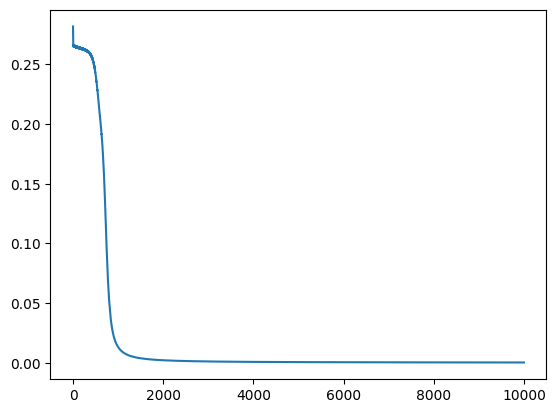

In [8]:
for param in model.named_parameters():
    print(param)
    
input = torch.tensor([0,1], dtype = torch.float32).to(device)
model.eval()
print('The input is = {}'.format(input))
print('Output y predicted = {}'.format(model(input)))

plt.plot(loss_list)
plt.show()

### 2) 

In [17]:
loss_list = []

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.w = torch.nn.Parameter(torch.rand([1]))
        self.b = torch.nn.Parameter(torch.rand([1]))
        
        self.linear1 = nn.Linear(2,2,bias=True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2,1,bias=True)
        self.activation2 = nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x

In [18]:
full_dataset = MyDataset(X, Y)
batch_size = 1

train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): Sigmoid()
)


In [19]:
def train_one_epoch(epoch_index):
    totalloss = 0.
    
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        
        optimizer.step()
        totalloss += loss.item()
        
    return totalloss/(len(train_data_loader) * batch_size)

EPOCHS = 10000
for epoch in range(EPOCHS):
    
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    
    if epoch%1000 ==0:
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

Epoch 0/10000, Loss: 0.25162649154663086
Epoch 1000/10000, Loss: 0.025374165852554142
Epoch 2000/10000, Loss: 0.0029860046633984894
Epoch 3000/10000, Loss: 0.0014750428963452578
Epoch 4000/10000, Loss: 0.0009558233432471752
Epoch 5000/10000, Loss: 0.0006997055243118666
Epoch 6000/10000, Loss: 0.0005483767236000858
Epoch 7000/10000, Loss: 0.00044939150029676966
Epoch 8000/10000, Loss: 0.0003797751014644746
Epoch 9000/10000, Loss: 0.0003282072866568342


('w', Parameter containing:
tensor([0.7528], device='cuda:0', requires_grad=True))
('b', Parameter containing:
tensor([0.9529], device='cuda:0', requires_grad=True))
('linear1.weight', Parameter containing:
tensor([[ 2.1958,  2.1958],
        [-2.1881, -2.1881]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-2.1959,  2.1881], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-3.7753, -3.7886]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([3.8383], device='cuda:0', requires_grad=True))
The input is = tensor([0., 1.], device='cuda:0')
Output y predicted = tensor([0.9789], device='cuda:0', grad_fn=<SigmoidBackward0>)


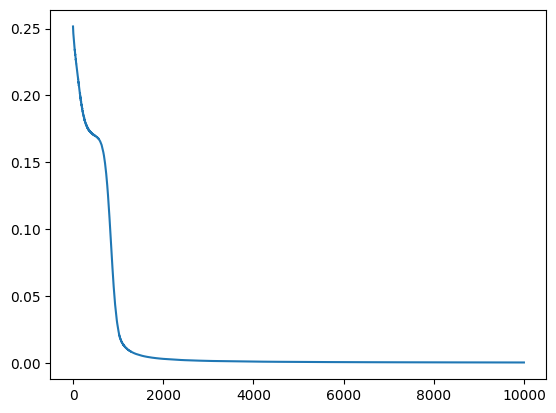

In [20]:
for param in model.named_parameters():
    print(param)
    
input = torch.tensor([0,1], dtype = torch.float32).to(device)
model.eval()
print('The input is = {}'.format(input))
print('Output y predicted = {}'.format(model(input)))

plt.plot(loss_list)
plt.show()

### 4)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

In [4]:
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)     # Second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = FeedForwardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")

Epoch [1/10], Loss: 0.3947
Epoch [2/10], Loss: 0.1918
Epoch [3/10], Loss: 0.1429
Epoch [4/10], Loss: 0.1108
Epoch [5/10], Loss: 0.0938
Epoch [6/10], Loss: 0.0840
Epoch [7/10], Loss: 0.0730
Epoch [8/10], Loss: 0.0644
Epoch [9/10], Loss: 0.0606
Epoch [10/10], Loss: 0.0538


In [5]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

Test Accuracy: 97.39%


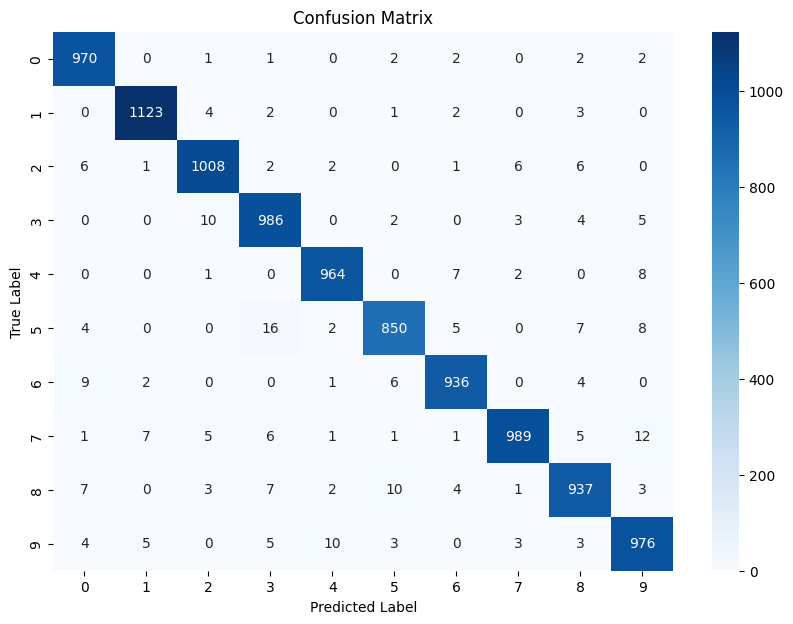

Number of learnable parameters: 109386


In [7]:
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of learnable parameters: {num_params}")
